In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai import *
from fastai.text import *
from fastai.core import *
from fastai.metrics import error_rate
import torch

In [0]:
path = '/content/gdrive/My Drive/Colab Notebooks/urdu text sentiment analysis/'
data_csv = path + 'data.csv'
data = pd.read_csv(data_csv)
data = data.drop(data.columns[[3, 2]], axis=1)
#data.head()

In [0]:
#loading training and validation data
train_text = data.loc[0:16184, 'sentence'].values
train_labels = data.loc[0:16184, 'sentiment'].values
valid_text = data.loc[16185:20230, 'sentence'].values
valid_labels = data.loc[16185:20230, 'sentiment'].values

In [0]:
np.random.seed(42)
train_i = np.random.permutation(len(train_text))
valid_i = np.random.permutation(len(valid_text))

In [0]:
train_text = train_text[train_i]
valid_text = valid_text[valid_i]

In [0]:
col_names = ['labels', 'text']
df_train = pd.DataFrame({'text':train_text, 'labels':train_labels}, columns=col_names)
df_valid = pd.DataFrame({'text':valid_text, 'labels':valid_labels}, columns=col_names)

In [0]:
data_lm = TextLMDataBunch.from_df('./', train_df=df_train, valid_df=df_valid)

In [0]:
#url = 'http://files.fast.ai/models/wt103_v1/'
#download_url(f'{url}lstm_wt103.pth', 'models/lstm_wt103.pth')
#download_url(f'{url}itos_wt103.pkl', 'models/itos_wt103.pkl')

In [0]:
#learner = language_model_learner(data_lm, AWD_LSTM, pretrained_fnames=['lstm_wt103', 'itos_wt103'], drop_mult=0.5)
#learn.fit_one_cycle(1, 1e-2)

In [0]:
data_lm.save('data_clas.pkl')

In [0]:
data_clas = load_data(path, 'data_clas.pkl')
len(data_clas.vocab.itos) == len(data_lm.vocab.itos)

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)

In [61]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


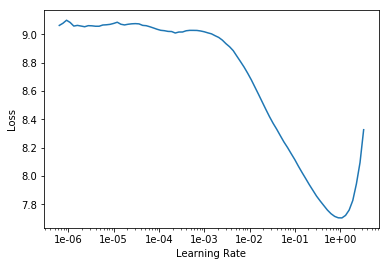

In [62]:
learn.recorder.plot()

In [64]:
learn.fit_one_cycle(1, 1e-01)

epoch,train_loss,valid_loss,accuracy,time
0,5.628396,5.680904,0.213374,00:13


In [69]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,4.491077,5.433206,0.221708,00:17
